<h1>Monthly Foreclosures Prediction <br>
Using Linear Regression</h1>

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

<h2> Read data set, assign features and split into X and y </h2>

In [11]:
df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)

In [12]:
def isJan(date):
    if date[5:7] == '01':
        return 1
    else:
        return 0
    
df['isJan'] = df['DATE'].apply(lambda x: isJan(x))

df
#df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
#df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels = (df.columns)
feature_labels = feature_labels.drop(['FORECLOSURE'])
#feature_labels =['DATE_DELTA','mnth_cos', 'mnth_sin', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']
X = df[feature_labels]
y = df[['FORECLOSURE']]

print(X.shape)
print(y.shape)
print(feature_labels)
print(len(feature_labels))

df

(105, 12)
(105, 1)
Index(['DATE', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM', 'ZHVI', 'MORT30US',
       'BofA_Yield_Index_PCH', 'CA_Consumer_Price_Index', 'CPI STICKY',
       'isJan', 'DATE_DELTA'],
      dtype='object')
12


,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,isJan,DATE_DELTA
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814,1,0.0
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186,0,31.0
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857,0,59.0
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161,0,90.0
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235,0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575,0,3042.0
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963,0,3073.0
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465,0,3103.0
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544,0,3134.0


In [13]:
date_delta = X['DATE_DELTA']
feature_labels_less_Date = feature_labels.drop(['DATE','DATE_DELTA'])
names = {}
for i in range(0,len(feature_labels_less_Date)):
    names[i] = feature_labels_less_Date[i]

X = pd.DataFrame(preprocessing.scale(X[feature_labels_less_Date])).rename(columns = names)
X = X.join(date_delta)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=2)
print(X_test.shape)
print(y_test.shape)
print(feature_labels_less_Date)

(25, 11)
(25, 1)
Index(['CAUR', 'Average DGS', 'DFF', 'NASDAQCOM', 'ZHVI', 'MORT30US',
       'BofA_Yield_Index_PCH', 'CA_Consumer_Price_Index', 'CPI STICKY',
       'isJan'],
      dtype='object')


<h2>Plot results</h2>

R_2: 0.7122761615380033, RMSE 334.04455023073723 i 0
0.7122761615380033
R_2: 0.5346073516901582, RMSE 166.8921968610478 i 1
0.5346073516901582
R_2: 0.6353473595364549, RMSE 384.1821162098467 i 2
0.6353473595364549
R_2: -0.10890726257642402, RMSE 157.13249310293767 i 3
0.10890726257642402
R_2: 0.7049972690915982, RMSE 328.39908487531704 i 4
0.7049972690915982
R_2: 0.7264322962425207, RMSE 169.94650471860984 i 5
0.7264322962425207
R_2: -0.016860938512467394, RMSE 297.42688657543306 i 6
0.016860938512467394


<Figure size 640x480 with 0 Axes>

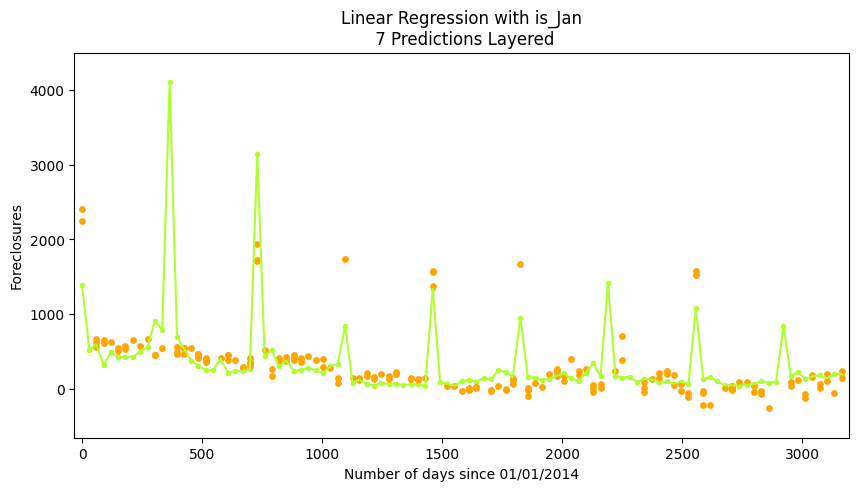

R_2 avg: 0.5732381065312712, RMSE 262.57483322484705 i 6


In [14]:
# Plot the results
avg_rmse = 0
avg_r2 = 0

plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
for i in range(0,7):
    X_train, X_test_3, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred_3 = regressor.predict(X_test_3)
    mse = metrics.mean_squared_error(y_test, y_pred_3)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred_3)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred_3))
    print(abs(r2_score(y_test,y_pred_3)))

    plt.scatter(X_test_3['DATE_DELTA'], y_pred_3,s=15, c="orange")
plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Linear Regression with is_Jan\n 7 Predictions Layered")
plt.savefig('../plots/LinearRegression_Multiple_runs_with_isJan.png')
plt.show()
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")

R^2 score: -4.795892664297505 RMSE:  782.2399485787079
Y intercept: [1311.57015313]
Coefficients: [[  17.21845433 -198.0249225    76.27282042  -57.33411981    8.43903814
    39.3260162    -1.69376295  359.39808159  -13.29202829  428.47522509
    -0.60927505]]
17.22*X_0 + -198.02*X_1 + 76.27*X_2 + -57.33*X_3 + 8.44*X_4 + 39.33*X_5 + -1.69*X_6 + 359.40*X_7 + -13.29*X_8 + 428.48*X_9 + -0.61*X_10 


<Figure size 640x480 with 0 Axes>

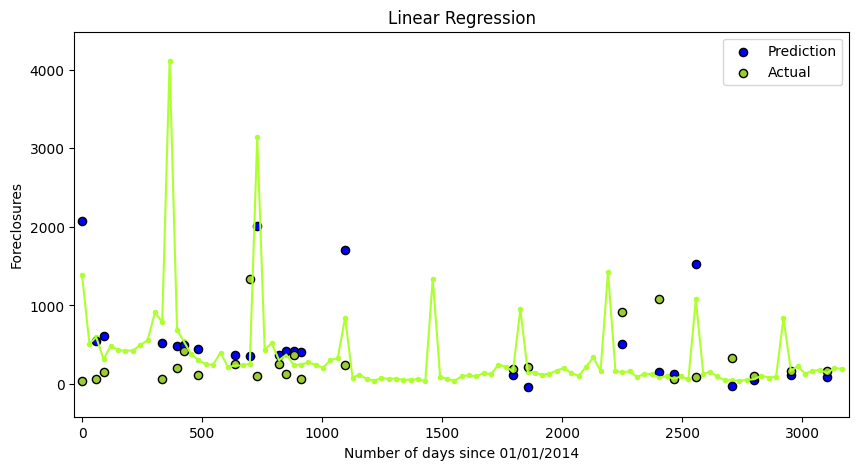

In [6]:
linregression = LinearRegression()
linregression.fit(X_train,y_train)
y_pred = linregression.predict(X_test)
y_pred
r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
y_intercept = linregression.intercept_
lin_coef = linregression.coef_
print(f"R^2 score: {r2_score(y_test,y_pred)} RMSE:  {rmse}")
print(f"Y intercept: {y_intercept}")
print(f"Coefficients: {lin_coef}")

# Plot the results
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=35, edgecolor="black", c="blue", label="Prediction")
plt.scatter(X_test['DATE_DELTA'], y_test, s=35, edgecolor="black", c="yellowgreen", label="Actual")

message = ""
lin_coef = lin_coef.flatten()
#print(lin_coef)
for i in range(0, len(X.columns)):
    #message += str(f"{lin_coef[i]:.2f}*{X.columns[i]} + ")
    message += str(f"{lin_coef[i]:.2f}*X_{i} + ")
print(message[:-2])

plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Linear Regression")
plt.legend()
plt.savefig('../plots/LinearRegression.png')
plt.show()

In [7]:
message = ""
lin_coef = lin_coef.flatten()
print(lin_coef)
for i in range(0, len(X.columns)):
    #message += str(f"{lin_coef[i]:.2f}*{X.columns[i]} + ")
    message += str(f"{lin_coef[i]:.2f}*X_{i} + ")
print(message[:-2])


[  17.21845433 -198.0249225    76.27282042  -57.33411981    8.43903814
   39.3260162    -1.69376295  359.39808159  -13.29202829  428.47522509
   -0.60927505]
17.22*X_0 + -198.02*X_1 + 76.27*X_2 + -57.33*X_3 + 8.44*X_4 + 39.33*X_5 + -1.69*X_6 + 359.40*X_7 + -13.29*X_8 + 428.48*X_9 + -0.61*X_10 


R_2: 0.7122761615380033, RMSE 334.04455023073723 i 0
0.7122761615380033


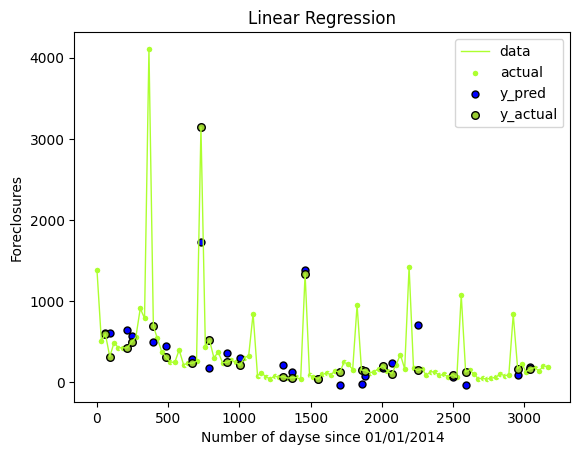

R_2: 0.5346073516901582, RMSE 166.8921968610478 i 1
0.5346073516901582


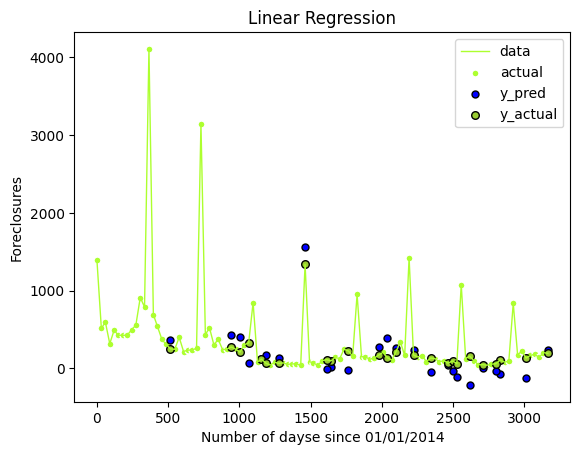

R_2: 0.6353473595364549, RMSE 384.1821162098467 i 2
0.6353473595364549


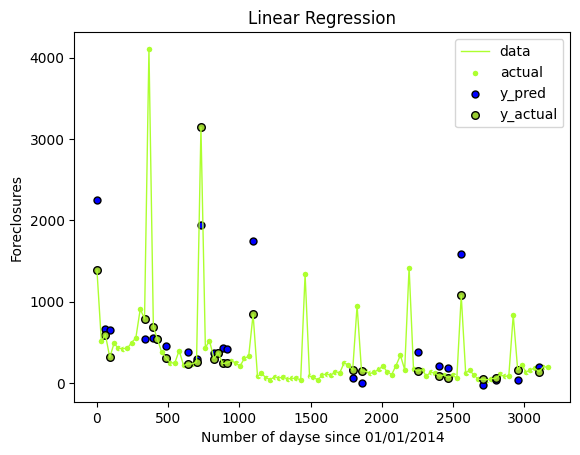

R_2: -0.10890726257642402, RMSE 157.13249310293767 i 3
0.10890726257642402


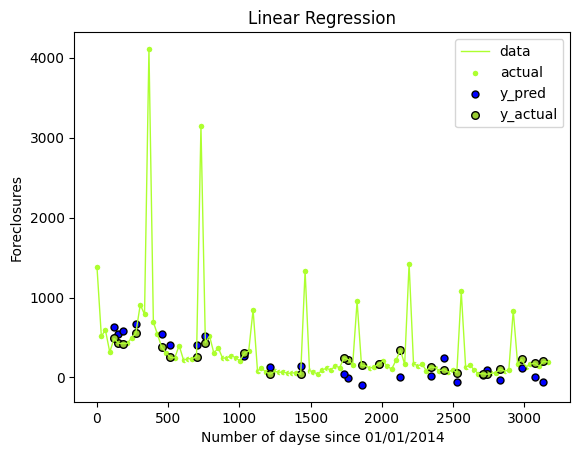

R_2: 0.7049972690915982, RMSE 328.39908487531704 i 4
0.7049972690915982


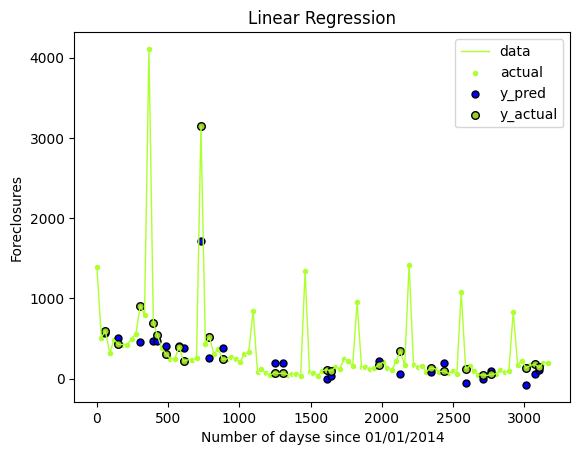

R_2: 0.7264322962425207, RMSE 169.94650471860984 i 5
0.7264322962425207


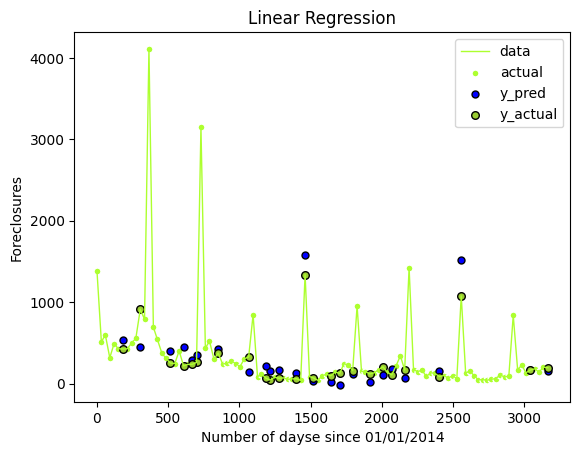

R_2: -0.016860938512467394, RMSE 297.42688657543306 i 6
0.016860938512467394


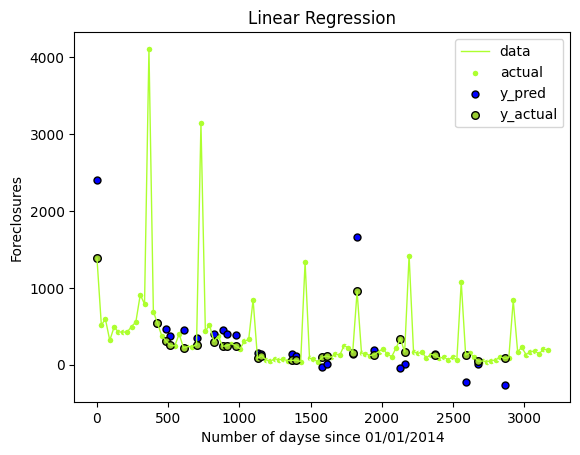

R_2: 0.5103469694726676, RMSE 551.3611683151887 i 7
0.5103469694726676


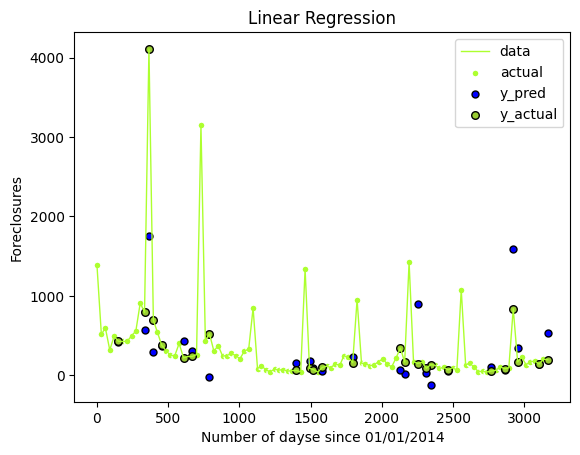

R_2: 0.4685590502365945, RMSE 705.6989294907074 i 8
0.4685590502365945


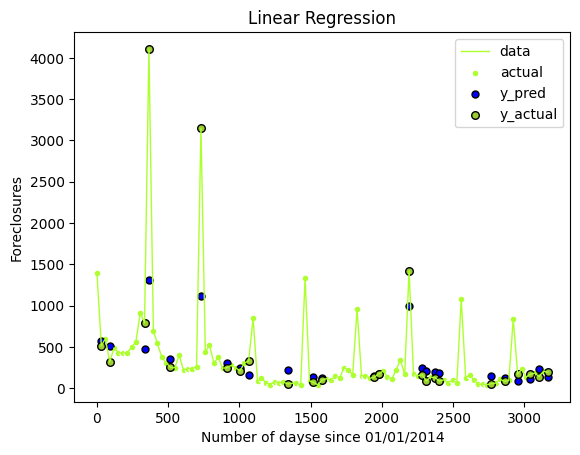

R_2: 0.6832726543935151, RMSE 174.21656325815752 i 9
0.6832726543935151


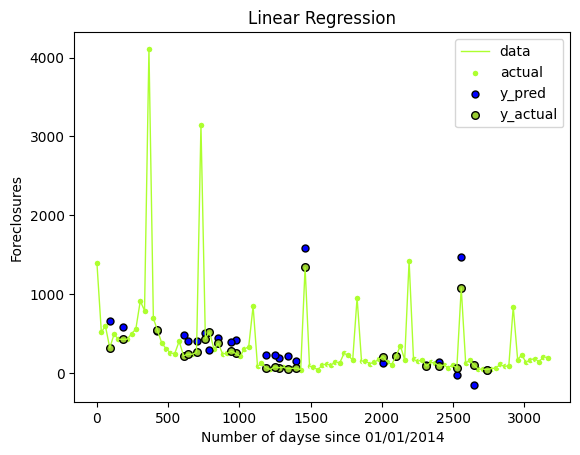

R_2 avg: 0.5668452570322671, RMSE 326.9300493637983 i 9


In [8]:
import matplotlib.pyplot as plt
avg_rmse = 0
avg_r2 = 0
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    linregression = LinearRegression()
    linregression.fit(X_train,y_train)
    y_pred = linregression.predict(X_test)
    
    #regressor = DecisionTreeRegressor(max_depth=13, random_state=10)
    #regressor = DecisionTreeRegressor(max_depth=12, random_state=1, min_weight_fraction_leaf=0.01)#, criterion=i)
    #regressor.fit(X_train,y_train)
    
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred))
    print(abs(r2_score(y_test,y_pred)))
        # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=25, edgecolor="black", c="blue", label="y_pred")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=30, edgecolor="black", c="yellowgreen", label="y_actual")

    plt.xlabel("Number of dayse since 01/01/2014")
    plt.ylabel("Foreclosures")
    plt.title("Linear Regression")
    plt.legend()
    plt.show()
    
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")
